# Forecasting Mini-Course Sales

In [69]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def smape(actual: np.ndarray, predicted: np.ndarray):
    return 100/len(actual) * np.sum(2 * np.abs(predicted - actual) / (np.abs(actual) + np.abs(predicted)))

def preprocessing_data(df):
    df["sale_day"] = df["date"].dt.day
    df["sale_month"] = df["date"].dt.month
    df["sale_year"] = df["date"].dt.year
    df["weekday"] = df["date"].dt.weekday
    df["quater"] = df["date"].dt.quarter
    df["day_sin"] = np.sin(df["sale_day"])
    df["day_cos"] = np.cos(df["sale_day"])
    df["month_sin"] = np.sin(df["sale_month"])
    df["month_cos"] = np.cos(df["sale_month"])
    df["year_sin"] = np.sin(df["sale_year"])
    df["year_cos"] = np.cos(df["sale_year"])
    
    from datetime import date
    import holidays
    
    df["holidays"] = pd.Series(df.index).apply(lambda x: holidays.CountryHoliday(df.country[x]).get(x)).values
    
    for label, content in df.items():
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        
    for label, content in df.items():
        if not pd.api.types.is_numeric_dtype(content):
            df[label] = pd.Categorical(content).codes
        
    df.drop("id",axis=1,inplace=True)
    
    return df

In [4]:
train = pd.read_csv("playground-series-s3e19/train.csv", parse_dates=["date"])

In [5]:
test = pd.read_csv("playground-series-s3e19/test.csv", parse_dates=["date"])

In [7]:
train = preprocessing_data(train)
test = preprocessing_data(test)

In [75]:
train.holidays.unique()

array([ 1,  0, -1], dtype=int8)

In [10]:
X = train.drop(["date","num_sold"],axis=1)
y = train["num_sold"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)

y_preds = model.predict(X_test)

smape = smape(y_test,y_preds)

In [11]:
score

0.9911361875570697

In [12]:
smape

5.491742856034473

In [14]:
y_preds_test = model.predict(test.drop(["date"],axis=1))

In [19]:
y_preds_test

array([ 32.83,  33.8 ,   4.91, ..., 112.49, 671.37, 538.14])

In [20]:
results = pd.DataFrame()
df_s = pd.read_csv("playground-series-s3e19/sample_submission.csv")
results["id"] = df_s["id"]
results["num_sold"] = y_preds_test
results

,id,num_sold
0,136950,32.83
1,136951,33.80
2,136952,4.91
3,136953,32.41
4,136954,29.70
...,...,...
27370,164320,678.09
27371,164321,706.32
27372,164322,112.49
27373,164323,671.37


In [22]:
results.to_csv("playground-series-s3e19/results",index=False)

In [44]:
rf_grid = {"n_estimators":np.arange(10,100,10),
          "max_depth":[None, 3, 5, 10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2),
          "max_features":[.5,1,"sqrt","auto"]}

from sklearn.model_selection import RandomizedSearchCV

rf_rs = RandomizedSearchCV(model,rf_grid,cv=5,verbose=2,n_iter=100,random_state=42, n_jobs=-1)

In [45]:
rf_rs.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   random_state=42, verbose=2)

In [48]:
rf_rs.best_params_

{'n_estimators': 40,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None}

In [49]:
model2 = RandomForestRegressor(n_estimators = 40,
                               min_samples_split = 2,
                               min_samples_leaf = 1,
                               max_features = 'auto',
                               max_depth = None,
                               random_state=42,
                               n_jobs=-1)

In [50]:
model2.fit(X_train,y_train)

/Users/adityasingh/Desktop/bulldozer-price-prediction-project/env/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(max_features='auto', n_estimators=40, n_jobs=-1,
                      random_state=42)

In [51]:
model2.score(X_test,y_test)

0.9908955437307362

In [52]:
smape(y_test,model2.predict(X_test))

5.540102396776354

In [53]:
model.feature_importances_

array([0.23141743, 0.47541426, 0.24599463, 0.00500309, 0.00985544,
       0.0034305 , 0.00914049, 0.0026172 , 0.00153378, 0.00140504,
       0.0016733 , 0.00357382, 0.00364338, 0.00401799, 0.00127964])

<BarContainer object of 15 artists>

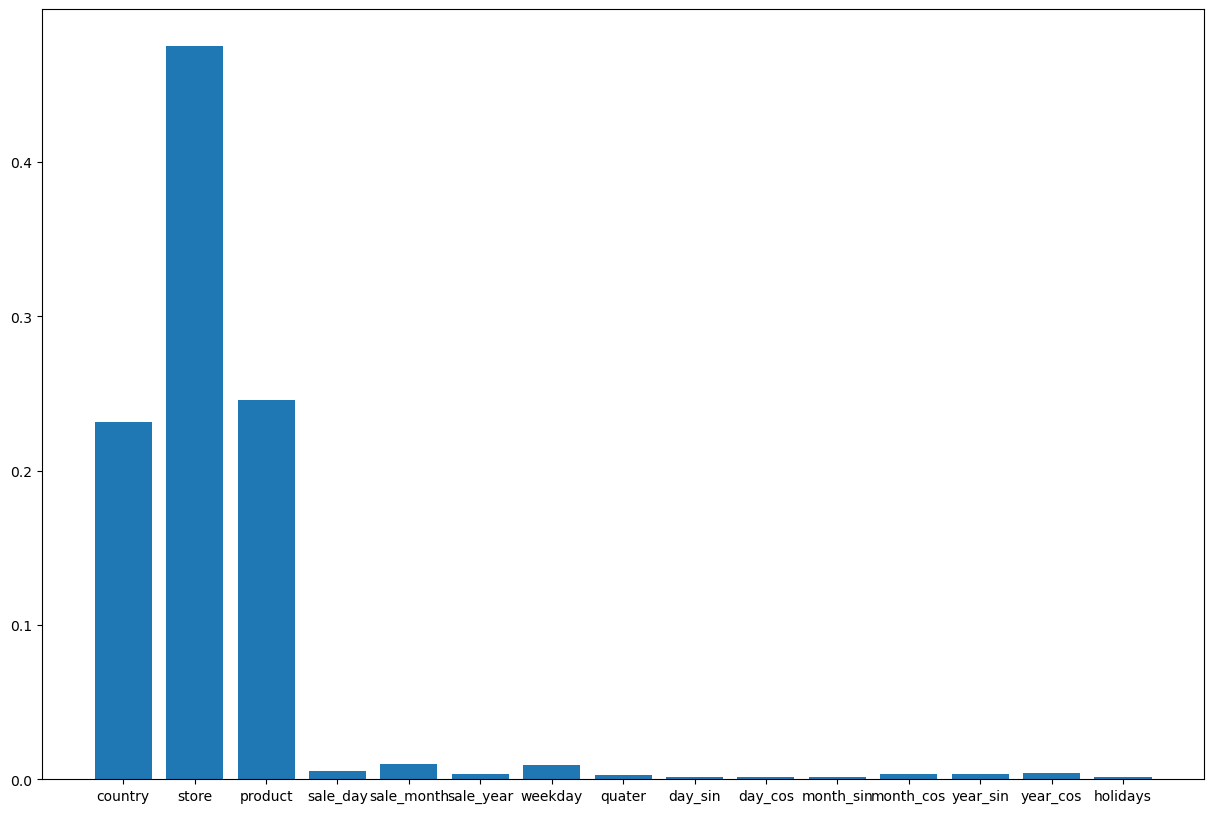

[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=14, n_estimators=80; total time=   4.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=40; total time=   1.9s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=6, n_estimators=80; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=8, n_estimators=20; total time=   1.3s
[CV] END max_depth=3, max_features=1, min_samples_leaf=9, min_samples_split=12, n_estimators=80; total time=   1.0s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=80; total time=   1.6s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=80; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_sa

[CV] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=12, n_estimators=60; total time=   2.6s
[CV] END max_depth=None, max_features=1, min_samples_leaf=1, min_samples_split=12, n_estimators=60; total time=   2.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=9, min_samples_split=2, n_estimators=80; total time=   1.4s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=6, n_estimators=80; total time=   1.8s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=16, n_estimators=20; total time=   1.5s
[CV] END max_depth=None, max_features=0.5, min_samples_leaf=11, min_samples_split=14, n_estimators=80; total time=  10.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=60; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=5, min_samples_split=14, n_estimators=70; total time=   2.0s
[CV] END max_depth=None, max_features=sqrt, min_

[CV] END max_depth=5, max_features=0.5, min_samples_leaf=19, min_samples_split=14, n_estimators=80; total time=   4.2s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=13, min_samples_split=10, n_estimators=90; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=15, min_samples_split=14, n_estimators=40; total time=   1.7s
[CV] END max_depth=10, max_features=1, min_samples_leaf=19, min_samples_split=6, n_estimators=80; total time=   1.9s
[CV] END max_depth=3, max_features=auto, min_samples_leaf=15, min_samples_split=8, n_estimators=20; total time=   1.4s
[CV] END max_depth=3, max_features=1, min_samples_leaf=9, min_samples_split=12, n_estimators=80; total time=   0.8s
[CV] END max_depth=3, max_features=1, min_samples_leaf=9, min_samples_split=12, n_estimators=80; total time=   0.9s
[CV] END max_depth=3, max_features=sqrt, min_samples_leaf=17, min_samples_split=16, n_estimators=80; total time=   1.5s
[CV] END max_depth=10, max_features=sqrt, min_sample

In [55]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(X_train.columns,model.feature_importances_)

In [56]:
X = train.drop(["date","num_sold","day_sin","day_cos","month_sin","holidays"],axis=1)
y = train["num_sold"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)

y_preds = model.predict(X_test)

smape = smape(y_test,y_preds)

In [57]:
score

0.9919621380829705

In [58]:
smape

5.319814332777161

In [61]:
y_preds_test_2 = model.predict(test.drop(["date","day_sin","day_cos","month_sin","holidays"],axis=1))

In [62]:
results2 = pd.DataFrame()
df_s = pd.read_csv("playground-series-s3e19/sample_submission.csv")
results2["id"] = df_s["id"]
results2["num_sold"] = y_preds_test_2
results2

,id,num_sold
0,136950,34.10
1,136951,34.72
2,136952,5.03
3,136953,33.83
4,136954,30.08
...,...,...
27370,164320,699.41
27371,164321,714.83
27372,164322,114.07
27373,164323,696.75


In [63]:
results2.to_csv("playground-series-s3e19/results",index=False)

<BarContainer object of 11 artists>

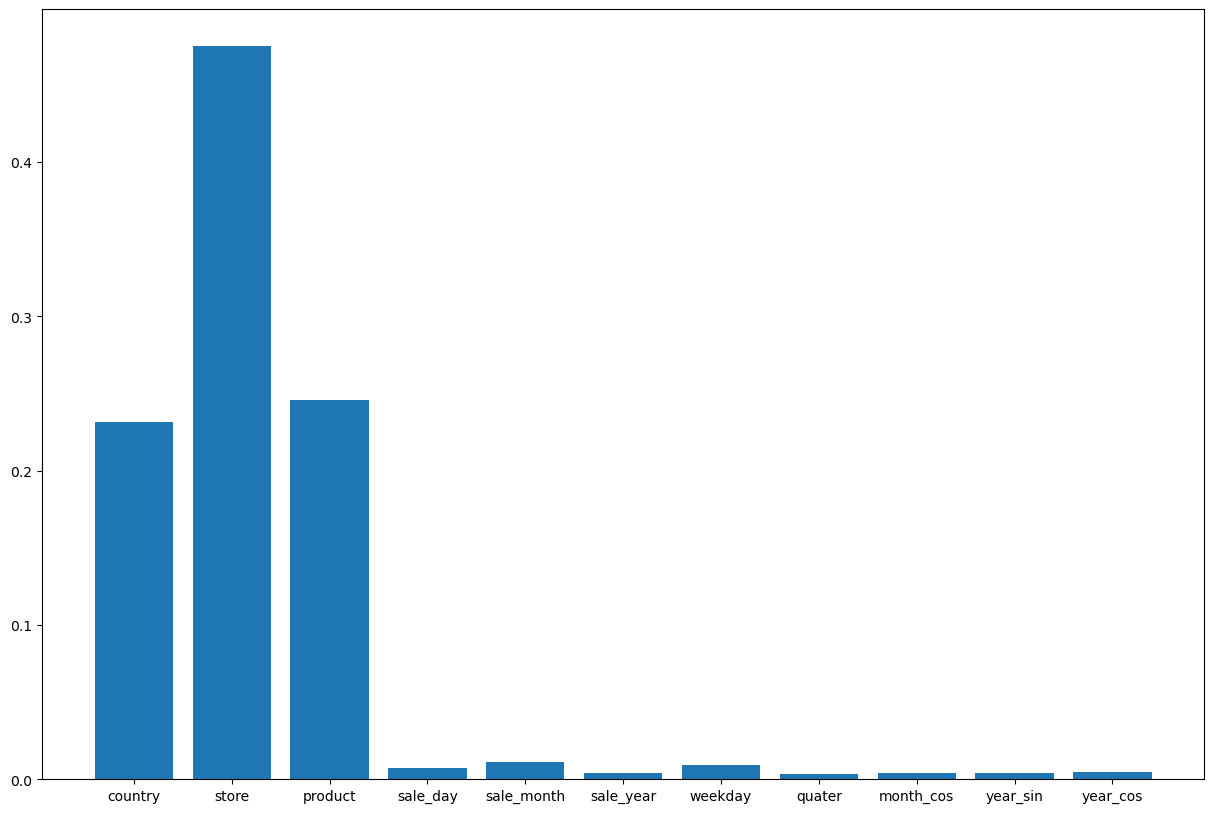

In [64]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(X_train.columns,model.feature_importances_)

In [66]:
X = train.drop(["date","num_sold","day_sin","day_cos","month_sin","holidays","quater","sale_year","month_cos","year_sin","year_cos"],axis=1)
y = train["num_sold"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train,y_train)
score = model.score(X_test,y_test)

y_preds = model.predict(X_test)

# smape = smape(y_test,y_preds)

In [67]:
score

0.9700297702909444

In [70]:
smape(y_test,y_preds)

12.070043745016186

<BarContainer object of 6 artists>

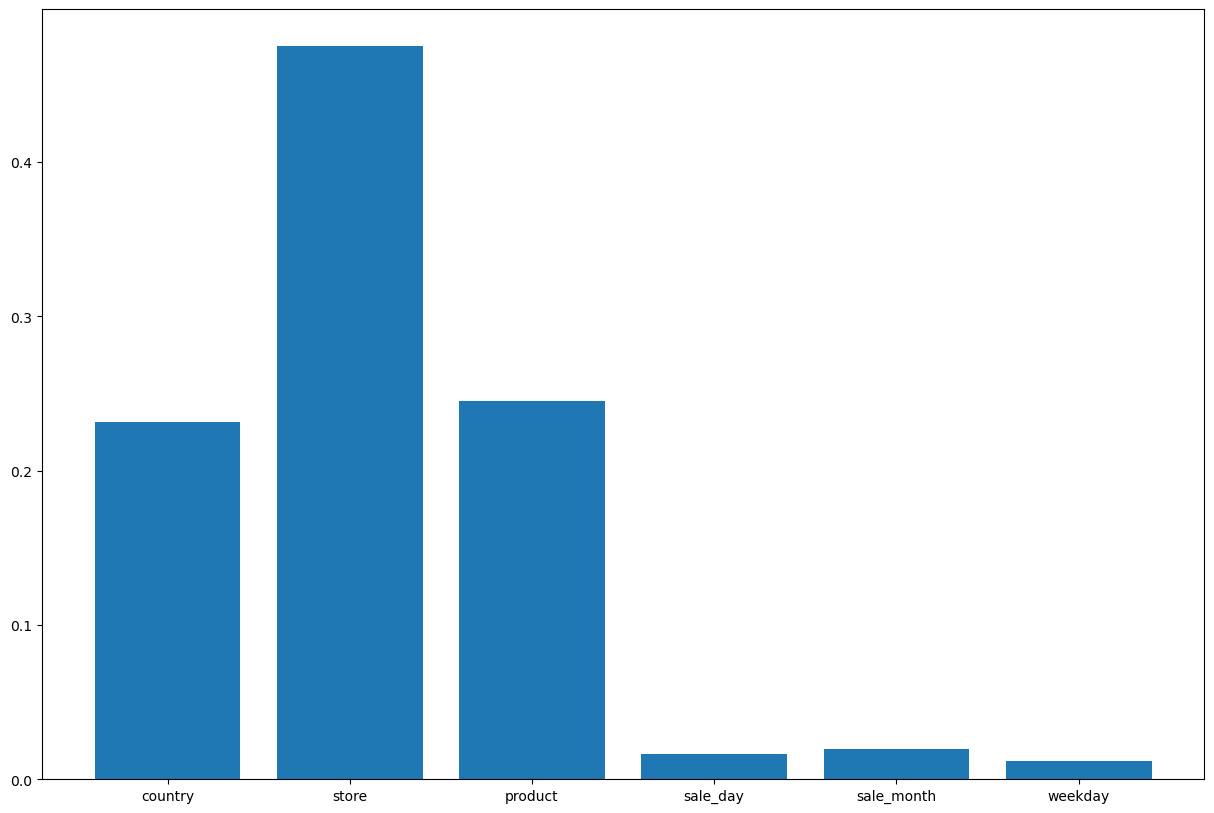

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
ax.bar(X_train.columns,model.feature_importances_)

In [77]:
X = train[train.sale_year!=2021]
y = train[train.sale_year==2021]

In [78]:
X_train, y_train = X.drop("num_sold",axis=1),X["num_sold"]
X_test, y_test = y.drop("num_sold",axis=1),y["num_sold"]

In [81]:
model = RandomForestRegressor(random_state=42,n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [82]:
model.score(X_test,y_test)

0.9246894215519995

In [83]:
smape(y_test,model.predict(X_test))

16.88650646139533

In [84]:
X_train.shape

(109575, 16)

In [85]:
X_test.shape

(27375, 16)

In [ ]:
10